In [2]:
import shutil
import random
import os

from tqdm import tqdm
from matplotlib import pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler

In [40]:
# Copy a couple jets to a different folder
if not os.path.isdir("./data/jets-sample"):
    os.mkdir("./data/jets-sample")

for i in tqdm(range(100000), ncols=100):
    file_name = f"event_{str(i).zfill(7)}.npz"
    shutil.copyfile(f"./data/jets/{file_name}", f"./data/jets-sample/{file_name}")

# Stopped at 62000

 62%|██████████████████████████████████▊                     | 62114/100000 [39:19<23:59, 26.32it/s]


KeyboardInterrupt: 

In [42]:
# Collect all features
events = []
for i in tqdm(range(10000), ncols=100):
    events.append(np.load(f"./data/jets-sample/event_{str(i).zfill(7)}.npz"))

100%|████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 435.77it/s]


In [ ]:
# Normalize all features
# They are:
#   p_T: transverse momentum (radial)
#   eta: angular coordinate
#   phi: angular coordinate
#   E  : energy
#   R  : sqrt(eta^2 + phi^2)

scaler = StandardScaler()

for event in events:
    scaler.fit(event["x"])

for i in range(len(events)):
    scaler.transform(events[i]["x"])

100%|██████████| 1000/1000 [00:00<00:00, 1157.69it/s]


(52562,)


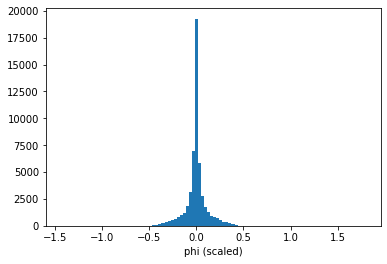

In [ ]:
all_eta = np.array([])
for event in tqdm(events):
    all_eta = np.hstack((all_eta, event["x"][:, 1]))

print(all_eta.shape)

plt.hist(all_eta, bins=100);
plt.xlabel("phi (scaled)");

In [ ]:
all_phi = np.array([])
for event in tqdm(events):
    all_phi = np.hstack((all_phi, event["x"][:, 2]))

print(all_phi.shape)

plt.hist(all_eta, bins=100);
plt.xlabel("phi (scaled)")

100%|██████████| 1000/1000 [00:01<00:00, 639.12it/s]

(52562,)


NameError: name 'all_eta' is not defined

In [ ]:
# Normalize energy ?

100%|██████████| 1000/1000 [00:00<00:00, 2515.60it/s]


(52562,)


Text(0.5, 0, 'energy (scaled)')

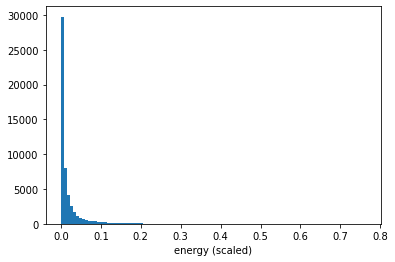

In [7]:
all_energy = np.array([])
for event in tqdm(events):
    all_energy = np.hstack((all_energy, event["x"][:, 3]))

print(all_energy.shape)

plt.hist(all_energy, bins=100);
plt.xlabel("energy (scaled)")

100%|██████████| 1000/1000 [00:00<00:00, 4260.20it/s]

(52562,)


Text(0.5, 0, 'energy (scaled)')

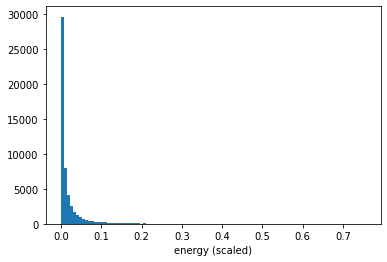

In [8]:
all_momentum = np.array([])
for event in tqdm(events):
    all_momentum = np.hstack((all_momentum, event["x"][:, 0]))

print(all_momentum.shape)

plt.hist(all_momentum, bins=100);
plt.xlabel("energy (scaled)")

Text(0, 0.5, 'Momentum)')

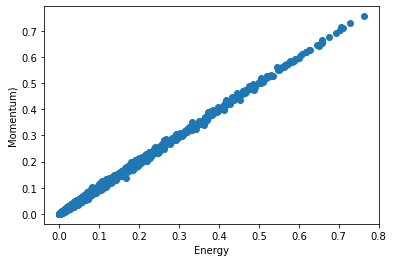

In [9]:
plt.scatter(x=all_energy, y=all_momentum)
plt.xlabel("Energy")
plt.ylabel("Momentum)")

## Analysis

In [43]:
import shutil
import random

from tqdm import tqdm
from matplotlib import pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler

In [44]:
labels = ["Gluon", "Light quark", "W boson", "Z boson", "Top quark"]

In [45]:
n_jets = len(events)
resolution = 50

def create_image(particle):
    image = np.zeros((resolution, resolution))

    for i in tqdm(range(n_jets)):
        y = events[i]["y"]
        if y[particle] != 1: continue

        # Plot a single thing
        my_event = events[i]["x"]

        etas = my_event[:, 1]
        phis = my_event[:, 2]
        energies = my_event[:, 3]

        hist = np.histogram2d(etas, phis, weights=energies, bins=50)

        image += hist[0]
    
    return image

In [46]:
# Add up all images for each category
images = [create_image(particle) for particle in range(5)]

  0%|          | 0/10000 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'open'

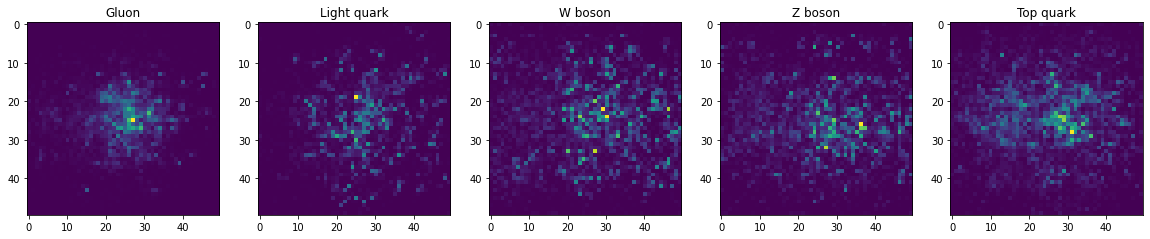

In [38]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].set_title(labels[i])

In [34]:
# Why is nothing showing for W and Z bosons?
w_boson = np.zeros((resolution, resolution))

for i, event in enumerate(events):
    if event["y"][2] == 1:
        jet = event["x"]
    
        etas, phis = jet[:, 1], jet[:, 2]
        energies = jet[:, 3]

        hist = np.histogram2d(etas, phis, weights=energies, bins=resolution)
        w_boson += hist[0]

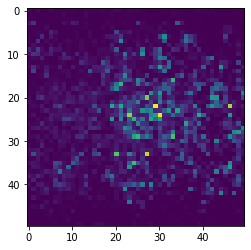

In [35]:
plt.imshow(w_boson)

In [18]:
# Look at frequencies
X = [event["x"] for event in events]
y = [event["y"] for event in events]

In [20]:
np.sum(y, axis=0)

array([198, 184, 207, 192, 219])